In [48]:
import pandas as pd

In [49]:
df = pd.read_csv("Depression Student Dataset.csv")
df

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
497,Male,26,5.0,2.0,More than 8 hours,Unhealthy,No,8,3,No,Yes
498,Male,24,2.0,1.0,Less than 5 hours,Unhealthy,Yes,8,5,No,Yes
499,Female,23,3.0,5.0,5-6 hours,Healthy,No,1,5,Yes,No
500,Male,33,4.0,4.0,More than 8 hours,Healthy,No,8,1,Yes,No


In [50]:
df.isnull().sum()

Gender                                   0
Age                                      0
Academic Pressure                        0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Study Hours                              0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [51]:
df["Dietary Habits"].unique()


array(['Moderate', 'Healthy', 'Unhealthy'], dtype=object)

In [52]:
df["Gender"] = df["Gender"].map({"Male":1,"Female":0})
df["Sleep Duration"] = df["Sleep Duration"].map({
    "Less than 5 hours": 0,
    "5-6 hours": 1,
    "7-8 hours": 2,
    "More than 8 hours": 3
})

df["Have you ever had suicidal thoughts ?"] = df["Have you ever had suicidal thoughts ?"].map({"No": 0, "Yes": 1})

df["Family History of Mental Illness"] = df["Family History of Mental Illness"].map({"No": 0, "Yes": 1})

df["Depression"] = df["Depression"].map({"No": 0, "Yes": 1})

df["Dietary Habits"] = df["Dietary Habits"].map({
    "Unhealthy": 0,
    "Moderate": 1,
    "Healthy": 2
})




In [53]:
df

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,28,2.0,4.0,2,1,1,9,2,1,0
1,1,28,4.0,5.0,1,2,1,7,1,1,0
2,1,25,1.0,3.0,1,0,1,10,4,0,1
3,1,23,1.0,4.0,3,0,1,7,2,1,0
4,0,31,1.0,5.0,3,2,1,4,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
497,1,26,5.0,2.0,3,0,0,8,3,0,1
498,1,24,2.0,1.0,0,0,1,8,5,0,1
499,0,23,3.0,5.0,1,2,0,1,5,1,0
500,1,33,4.0,4.0,3,2,0,8,1,1,0


In [54]:
from sklearn.metrics import  accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error,r2_score

In [55]:
df

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,28,2.0,4.0,2,1,1,9,2,1,0
1,1,28,4.0,5.0,1,2,1,7,1,1,0
2,1,25,1.0,3.0,1,0,1,10,4,0,1
3,1,23,1.0,4.0,3,0,1,7,2,1,0
4,0,31,1.0,5.0,3,2,1,4,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
497,1,26,5.0,2.0,3,0,0,8,3,0,1
498,1,24,2.0,1.0,0,0,1,8,5,0,1
499,0,23,3.0,5.0,1,2,0,1,5,1,0
500,1,33,4.0,4.0,3,2,0,8,1,1,0


In [56]:
df.columns


Index(['Gender', 'Age', 'Academic Pressure', 'Study Satisfaction',
       'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [57]:
x = df[['Gender', 'Age', 'Academic Pressure', 'Study Satisfaction',
       'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Study Hours',
       'Financial Stress', 'Family History of Mental Illness']]

y = df['Depression']

In [58]:
x_trian,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = KNeighborsClassifier(n_neighbors=5)

model.fit(x_trian,y_train)

y_pred = model.predict(x_test)

print("accuraxy_score",accuracy_score(y_test,y_pred))
print("root_square_mean_error",root_mean_squared_error(y_test,y_pred))

accuraxy_score 0.7425742574257426
root_square_mean_error 0.507371404963127


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [60]:
model1 = LogisticRegression()

model1.fit(x_trian,y_train)

y_pred1 = model1.predict(x_test)

print("accuraxy_score",accuracy_score(y_test,y_pred1))
print("confusion_matrix\n",confusion_matrix(y_test,y_pred1))
print("root_square_mean_error",root_mean_squared_error(y_test,y_pred))

accuraxy_score 0.9702970297029703
confusion_matrix
 [[45  3]
 [ 0 53]]
root_square_mean_error 0.507371404963127


In [61]:
from sklearn.ensemble import RandomForestClassifier


In [62]:
model2 = RandomForestClassifier(n_estimators=100)

model2.fit(x_trian,y_train)

y_pred2 = model2.predict(x_test)

print("accuracy_score",accuracy_score(y_test,y_pred2))
print("r2_score",r2_score(y_test,y_pred2))
print("confusion_matrix\n",confusion_matrix(y_test,y_pred2))
print("root_square_mean_error",root_mean_squared_error(y_test,y_pred2))



accuracy_score 0.9306930693069307
r2_score 0.7220911949685536
confusion_matrix
 [[43  5]
 [ 2 51]]
root_square_mean_error 0.26326209505561055


In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [64]:

model3 = DecisionTreeClassifier()
model3.fit(x_trian,y_train)
y_pred3 = model1.predict(x_test)

print("accuracy_score",accuracy_score(y_test,y_pred3))
print("root_square_mean_error",root_mean_squared_error(y_test,y_pred3))

accuracy_score 0.9702970297029703
root_square_mean_error 0.1723454968864278


In [65]:
df

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,28,2.0,4.0,2,1,1,9,2,1,0
1,1,28,4.0,5.0,1,2,1,7,1,1,0
2,1,25,1.0,3.0,1,0,1,10,4,0,1
3,1,23,1.0,4.0,3,0,1,7,2,1,0
4,0,31,1.0,5.0,3,2,1,4,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
497,1,26,5.0,2.0,3,0,0,8,3,0,1
498,1,24,2.0,1.0,0,0,1,8,5,0,1
499,0,23,3.0,5.0,1,2,0,1,5,1,0
500,1,33,4.0,4.0,3,2,0,8,1,1,0


In [66]:
new = [[1,24,5,3,3,1,1,7,2,1]]

new_data = model2.predict(new)

print("Prediction:", "depression" if new_data[0] == 0 else "no depression")


Prediction: no depression


e:\machine learnig\ml\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


C:\Users\91859\AppData\Local\Temp\ipykernel_26072\267002577.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


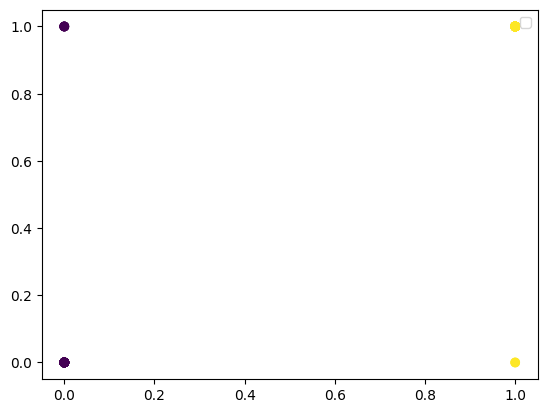

: 

In [ ]:
plt.scatter(y_test,y_pred2, c= y_test)
plt.legend()
plt.show()